In [1]:
import keras  
from keras.models import Sequential  
from keras.layers import Dense, Dropout, Flatten  
from keras.layers import Conv2D, MaxPooling2D  
#from keras.utils import to_categorical  
from keras.preprocessing import image  
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split  
from tqdm import tqdm

In [2]:
train = pd.read_csv('舌頭02genre.csv')
train.head()

,id,genre,舌色淡白,舌色淡紅,舌色紅,舌色降舌,舌色青紫,舌苔白,舌苔黃,舌苔灰黑,舌苔厚,舌頭胖瘦,舌苔濕,齒痕,裂痕,瘀點
0,1.jpg,"['舌色淡紅','舌苔厚','舌頭胖瘦','舌苔濕']",0,1,0,0,0,0,0,0,1,1,1,0,0,0
1,2.jpg,"['舌色淡白','舌苔厚','舌頭胖瘦','舌苔濕','齒痕']",1,0,0,0,0,0,0,0,1,1,1,1,0,0
2,3.jpg,"['舌色淡紅','舌色紅','舌苔厚','舌頭胖瘦']",0,1,1,0,0,0,0,0,1,1,0,0,0,0
3,4.jpg,"['舌色淡白','舌苔白','舌苔灰黑','舌苔厚','舌頭胖瘦']",1,0,0,0,0,1,0,1,1,1,0,0,0,0
4,5.jpg,"['舌色淡紅','舌色紅','舌苔白','舌苔厚','舌頭胖瘦']",0,1,1,0,0,1,0,0,1,1,0,0,0,0


In [3]:
train.columns  

Index(['id', 'genre', '舌色淡白', '舌色淡紅', '舌色紅', '舌色降舌', '舌色青紫', '舌苔白', '舌苔黃',
       '舌苔灰黑', '舌苔厚', '舌頭胖瘦', '舌苔濕', '齒痕', '裂痕', '瘀點'],
      dtype='object')

In [4]:
train_image = []  

for i in tqdm(range(train.shape[0])):  

    
    img = image.load_img('im0502/'+train['id'][i],target_size=(128,128,3))

    img = image.img_to_array(img)  

    img = img/255  

    train_image.append(img)  

X = np.array(train_image)  

100%|██████████| 1030/1030 [00:30<00:00, 33.89it/s]


In [5]:
X.shape

(1030, 128, 128, 3)

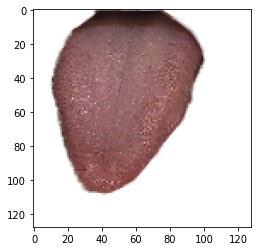

In [6]:
plt.imshow(X[2])

In [7]:
train['genre'][2]

"['舌色淡紅','舌色紅','舌苔厚','舌頭胖瘦']"

In [8]:
y = np.array(train.drop(['id', 'genre'],axis=1))

y.shape




(1030, 14)

In [9]:
'''numpy檢查 無執行的必要'''
y1 = train.drop(['id', 'genre'],axis=1)
y1.head()

,舌色淡白,舌色淡紅,舌色紅,舌色降舌,舌色青紫,舌苔白,舌苔黃,舌苔灰黑,舌苔厚,舌頭胖瘦,舌苔濕,齒痕,裂痕,瘀點
0,0,1,0,0,0,0,0,0,1,1,1,0,0,0
1,1,0,0,0,0,0,0,0,1,1,1,1,0,0
2,0,1,1,0,0,0,0,0,1,1,0,0,0,0
3,1,0,0,0,0,1,0,1,1,1,0,0,0,0
4,0,1,1,0,0,1,0,0,1,1,0,0,0,0


In [10]:
X_train, X_test, y_train, y_test =train_test_split(X, y, random_state=42, test_size=0.2)

In [11]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import RMSprop
conv_base = ResNet50(weights='imagenet', include_top=False, input_shape=(128,128, 3))

model = Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(14, activation='sigmoid'))
##for layer in conv_base.layers[:45]:
  ##  conv_base.trainable = False
##for layer in conv_base.layers[45:]:
  ##  conv_base.trainable = True
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=64)


C:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/100
